#  Optimization exercices : linear/logistic regression, PCA (and svm)

*June, 2022 - François HU*

*Master of Science - EPITA*

*This lecture is available here: https://curiousml.github.io/*

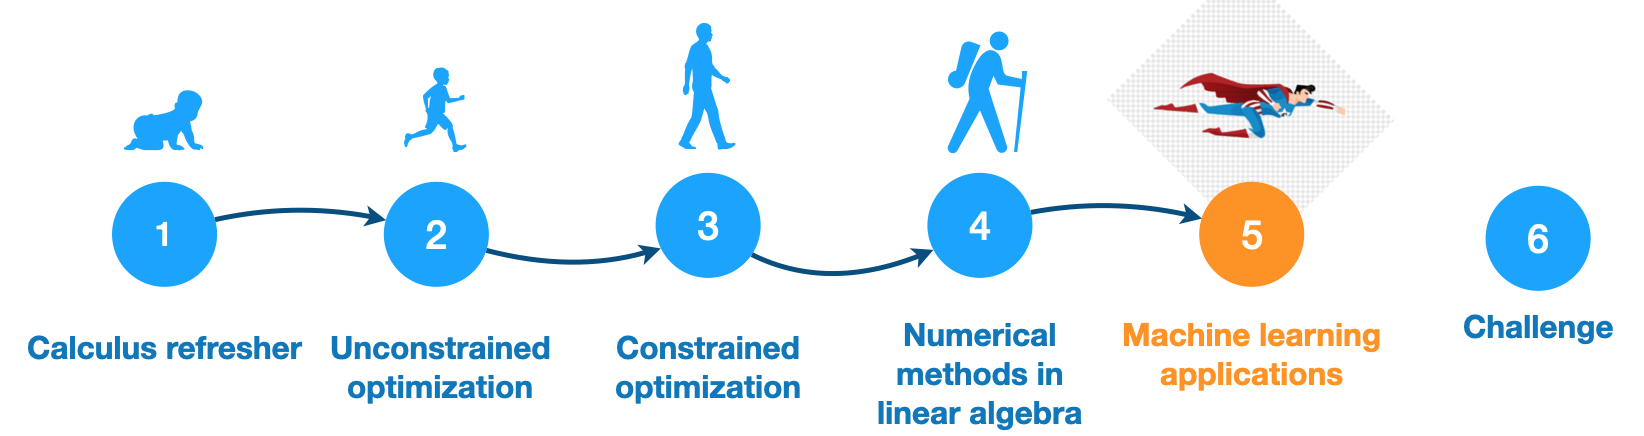

# Table of contents

- In this notebook we will learn **Machine Learning** (or statistical learning) modeling by practice


- see the courses *Machine Learning 1 and Machine Learning 2* for statistical learning theory


- [Application 1: Linear regression](#1) (**lecture 2 or 3**)
    - question 1
    - question 2
    - question 3
    - question 4
    - question 5
    - question 6


- [Application 2: Logistic regression](#2) (see **lecture 4 or 5**)
    
    
- [Application 3: PCA](#3) (see **lecture 4**)
    - question 1
    - question 2
    - question 3
    - question 4
    - question 5


- [(optional) Application 4: Ridge regression](#2) (see **lecture 4 or 5**)



- [(optional) Application 5: SVM](#4) (optional)
    - question 1
    - question 2
    - question 3


- [Application 5: Titanic challenge](#5) (<font color ="red">**EXAM: 27 JUNE 2022**</font>)

## Application 1: Linear regression <a name="1"></a>

Let us implement a **linear regression** from scratch using Python. Linear regression is one of the most basic and commonly used type of predictive analysis.

### Simple linear regression

- The objective of a **simple linear regression** is establishing a linear relationship between a single input variable (denoted $\mathbf{x} = [x_1, x_2, \cdots, x_n]\in\mathbb{R}^n$) and a single output variable (denoted $\mathbf{y} = [y_1, y_2, \cdots, y_n]\in\mathbb{R}^n$). 


- For all the observation $i$, we are trying to estimate $y_i$ by $\hat y_i$ and the most simplest form of the estimation is a linear combination of $x_i$:
$$
\hat y_i = \beta_0 + x_i\beta_1 \iff \hat y_i = x_i\beta^T
$$
with $\beta = [\beta_0, \beta_1]\in\mathbb{R}^2$ the model parameters (or coefficients). In other terms (matrix notation):

$$
\begin{bmatrix} \hat y_1\\ \hat y_2\\ \vdots\\ \hat y_n  \end{bmatrix} = 
\begin{bmatrix}
\beta_0 + x_1\beta_1\\ 
\beta_0 + x_2\beta_1\\ 
\vdots\\ 
\beta_0 + x_n\beta_1
\end{bmatrix} \iff
\underbrace{
\quad
\begin{bmatrix} 
\hat y_1\\ \hat y_2\\ \vdots\\ \hat y_n 
\end{bmatrix} = 
\begin{bmatrix}
1 &x_1\\ 
1 &x_2\\ 
\vdots&\vdots\\
1 &x_n
\end{bmatrix}
\times
\begin{bmatrix}
\beta_0\\ 
\beta_1
\end{bmatrix}
\quad}_{\\\boxed{\hat y = X\beta^T}}
$$

### Multiple linear regression

In **multiple linear regression**,
$$
X = \begin{bmatrix}
\mathbb{1}, X_{\cdot 1}, X_{\cdot 2}, \cdots, X_{\cdot m}
\end{bmatrix} = \begin{bmatrix}
1 & x_{1,1} & x_{1,2} & \cdots & x_{1,m}\\
1 & x_{2,1} & x_{2,2} & \cdots & x_{2,m}\\
1 &  &  & \vdots & \\
1 & x_{n,1} & x_{n,2} & \cdots & x_{n,m}\\
\end{bmatrix} \text{ and }
\hat y = \begin{bmatrix} y_1\\ y_2\\ \vdots\\ y_n \end{bmatrix}
$$

the estimation becomes:

$$
\hat y = \beta_0\times \mathbb{1} + \beta_1 X_{\cdot 1} + \beta_2 X_{\cdot 2} + \cdots + \beta_m X_{\cdot m} \iff \boxed{\hat y = X\beta^T}
$$

with $\beta = [\beta_0, \beta_1, \cdots, \beta_m]\in\mathbb{R}^{m+1}$ the model parameters (or coefficients).

We are trying to calibrate our parameter $\beta$ such that $\boxed{\hat y \approx \mathbf{y}}$

### Diabetes dataset

We consider the [diabete](https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset) dataset. More specifically we choose to study three variables:

- `bmi` (our $X_{\cdot 1}$) the body mass index of the population

- `bp` (our $X_{\cdot 2}$) the average blood pressure of the population

- and `target` (our $\mathbf{y}$) our output variable representing a quantitative measure of disease progression one year after baseline

In [1]:
# Execute this cell
from sklearn.datasets import load_diabetes
import pandas as pd
import numpy as np

np.random.seed(42)
diabete = load_diabetes(as_frame=True)
data = pd.concat((diabete["data"], diabete["target"]), axis=1)
data = data.sample(frac=1)

X_full = data.iloc[:300, :-1]
X = data[["bmi", "bp"]][:300]
y = data["target"][:300]

X_test_full = data.iloc[300:, :-1]
X_test = data[["bmi", "bp"]][300:]
y_test = data["target"][300:]

X.head()

,bmi,bp
287,-0.006206,-0.015999
211,0.036907,0.021872
72,-0.004050,-0.012556
321,0.051996,0.079254
73,-0.020218,-0.002228


#### Question 1:

Plot the following three graphs:

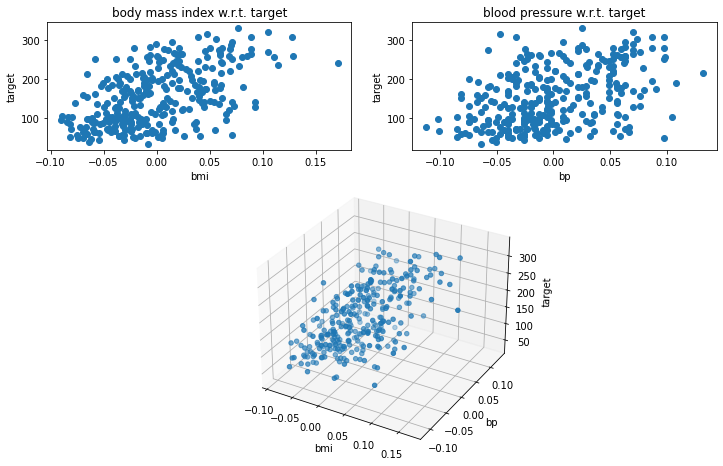

### Prediction

Given a parameter $\beta$ and a set of observations $x$, its predicted value is:

$$
\hat y = x \beta^T
$$

**Question 2:**

Define the function `predict(X, beta)` that returns the prediction $\hat y$.

### Training / optimization

We want to find the best paramater $\hat\beta = [\hat\beta_0, \hat\beta_1, \hat\beta_2] \in\mathbb{R}^3$ that minimizes a **(loss) function**. For instance, the **mean absolute error** (MAE) function,

$$
\min\limits_{\beta\in\mathbb{R}^3} \dfrac{1}{n}\sum\limits_{i=1}^{n}\left| y_i - \hat y_i \right|
$$

or a **mean squared error** (MSE) function,
$$
\min\limits_{\beta\in\mathbb{R}^3} \dfrac{1}{n}\sum\limits_{i=1}^{n}\left( y_i - \hat y_i \right)^2
\quad\text{ equivalently }\quad
\min\limits_{\beta\in\mathbb{R}^3} \left\lvert\left\lvert\ \mathbf{y} - \hat y\ \right\lvert\right\lvert^2
$$



#### Question 3:

Define the function `mse(y_hat, y)` that returns the MSE of $\hat y$ and $\mathbf{y}$.

Given a dataset $(X, y)$, optimization algorithms are used to find an optimal set of parameters (e.g. $\hat\beta_0$ and $\hat\beta_1$) that minimizes a loss function (e.g. MSE).

#### Question 4:

- Compute (theoretically) the partial derivatives $\dfrac{\partial \text{mse}}{\partial \beta_i}$ for $i\in\{0, 1, 2\}$. 


- Define (in python) the function `mse_gradient(y_hat, y)` that returns the gradient of the MSE.


- Define a function named `fit(X, y)` that minimizes the loss function MSE by gradient descent (see lecture 2) and returns the best parameter $\hat\beta$.

#### Question 5:

- Fit your linear regression on the data $(X, \mathbf{y})$.


- Predict the response (call it `y_hat`) of the set `X` and evaluate the model's performance with MSE.


- Predict the response (call it `y_hat_test`) of the set `X_test` and evaluate the model's performance with MSE.


- Which performance should be taken into account? the one with `y_hat`, the one with `y_hat_test` or both. Comment.

### A more direct method

The best paramater $\hat\beta \in\mathbb{R}^d$ that minimizes a **mean squared error** (MSE) function,

$$
\min\limits_{\beta\in\mathbb{R}^d} \left\lvert\left\lvert\ \mathbf{y} - X\beta^T\ \right\lvert\right\lvert^2
$$

Can easily be found anaytically:
$$
\min\left\lvert\left\lvert\ \mathbf{y} - X\beta^T\ \right\lvert\right\lvert^2
\iff
{\displaystyle ( {X} ^{\mathsf {T}} {X} ){\hat { {\beta }}}= {X} ^{\mathsf {T}}\mathbf {y}}
\iff
\boxed{{\widehat {\beta }}=(X^{T}X)^{-1}X^{T}\mathbf{y}}
$$

#### Question 6:

Implement this solution and compare it with the parameter found in question 5.

### With external package

**Training** the model with the most popular package in Machine Learing: [scikit-learn](https://scikit-learn.org/stable/)

- With only **two features** `bmi` and `bp`:

In [2]:
# EXECUTE THIS CELL
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# create linear regression object
linreg = LinearRegression()

# train the model
linreg.fit(X, y)

# make predictions
y_pred = linreg.predict(X_test)

print(f"Interc.\t: \t{linreg.intercept_}")
print(f"Coeffs\t: \t{linreg.coef_}")
print(f"MSE\t: \t{mean_squared_error(y_test, y_pred)}")

Interc.	: 	155.16822405495708
Coeffs	: 	[714.16586268 380.72249574]
MSE	: 	3587.7937570172867


- With **all features**:

In [3]:
# EXECUTE THIS CELL
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# create linear regression object
linreg = LinearRegression()

# train the model
linreg.fit(X_full, y)

# make predictions
y_pred = linreg.predict(X_test_full)

print(f"Interc.\t: \t{linreg.intercept_}")
print(f"Coeffs\t: \t{linreg.coef_}")
print(f"MSE\t: \t{mean_squared_error(y_test, y_pred)}")

Interc.	: 	154.21279975584497
Coeffs	: 	[  15.87712549 -255.13803391  442.9517807   263.31180376 -874.46174186
  560.34563851   36.16249272   17.5217229   878.96605803  119.83633627]
MSE	: 	3340.771440109735


## Application 2: Logistic regression <a name="2"></a> (lecture 4 or 5)

### Reminder : Linear regression

- **Model:** establish the linear relationship between $X\in\mathbb{R}^{n\times d}$ (features) and $\mathbf{y}\in \mathbb{R}^n$ (target). We estimate $\mathbf{y}$ with $\hat y$ such that:

$$\hat y = X\beta^T$$

- **Objective:** find the best paramater $\hat\beta \in\mathbb{R}^d$ that minimizes a **mean squared error** (MSE) function,

$$
\min\limits_{\beta\in\mathbb{R}^d} \dfrac{1}{n}\sum\limits_{i=1}^{n}\left( y_i - \hat y_i \right)^2
$$
or equivalently
$$
\min\limits_{\beta\in\mathbb{R}^d} \left\lvert\left\lvert\ \mathbf{y} - X\beta^T\ \right\lvert\right\lvert^2_2
$$

- **What if the target contains only binary responses ?**
    - if $\mathbf{y}\in \{0, 1\}^n$ we call this problem a <font color="red">(binary) classification</font> problem
    - if $\mathbf{y}\in \mathbb{R}^n$ we call it a <font color="red">regression</font> problem


### Logistic regression

- **Model:** use **logistic function** $\sigma(x)=1/(1+e^{-x})$ on top of a linear regression:

$$\hat y = \sigma(X\beta^T) = \frac{1}{1+e^{-X\beta^T}}$$

- **Objective:** find the best paramater $\hat\beta \in\mathbb{R}^d$ that minimizes a **log-loss** function,

$$
\min\limits_{\beta\in\mathbb{R}^d} \dfrac{1}{n}\sum\limits_{i=1}^{n}\left[ y_i\log(\hat y_i) + (1- y_i)\log(1-\hat y_i) \right]
$$

- **Question:** why we do not use the MSE ?

### Dataset : breast cancer

See [Breast cander Dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer) for the dataset's documentation.

In [2]:
# Execute this cell
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
np.random.seed(42)

cancer = load_breast_cancer()
X = cancer["data"]
y = cancer["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

### Using scikit-learn

#### Exercice

1. Fit your logistic regression on the training set. 
**Hint:** use `LogisticRegression` of `sklearn.linear_model`

**Remark:** Think of normalizing the data, e.g. with
```
def normalize(X):
    X = (X - X.mean(axis=0))/X.std(axis=0)
    return X
```

2. Predict the response of the test-set.


3. evaluate the model's performance. 
**Hint:** you can evaluate the number of correctly predicted responses out of all the responses.

## Application 3: PCA <a name="3"></a> (lecture 4)

### Diabetes dataset

In [4]:
# Execute this cell
from sklearn.datasets import load_diabetes
import pandas as pd
import numpy as np

np.random.seed(42)
diabete = load_diabetes(as_frame=True)
data = pd.concat((diabete["data"], diabete["target"]), axis=1)
data = data.sample(frac=1)

X_full = data.iloc[:300, :-1]
X = data[["bmi", "bp"]][:300]
y = data["target"][:300]

X_test_full = data.iloc[300:, :-1]
X_test = data[["bmi", "bp"]][300:]
y_test = data["target"][300:]

X_full.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
287,0.045341,-0.044642,-0.006206,-0.015999,0.125019,0.125198,0.019187,0.034309,0.032433,-0.005220
211,0.092564,-0.044642,0.036907,0.021872,-0.024960,-0.016658,0.000779,-0.039493,-0.022512,-0.021788
72,0.063504,0.050680,-0.004050,-0.012556,0.103003,0.048790,0.056003,-0.002592,0.084495,-0.017646
321,0.096197,-0.044642,0.051996,0.079254,0.054845,0.036577,-0.076536,0.141322,0.098646,0.061054
73,0.012648,0.050680,-0.020218,-0.002228,0.038334,0.053174,-0.006584,0.034309,-0.005145,-0.009362


### Implementing PCA from scratch

#### Question 1:

Define the function `dimred_pca(X, k)` that applies a dimensionality reduction on $X$ using PCA with $k$ the number of principal components.

### Visualization in 2D: case of Diabetes dataset

#### Question 2:

- Do a dimensionality reduction on the Diabetes dataset (use `X_full` instead of `X`) with $k=2$



- Scatterplot the reduced 2D datasets (**optional:** color the points w.r.t the target). You should have approximately

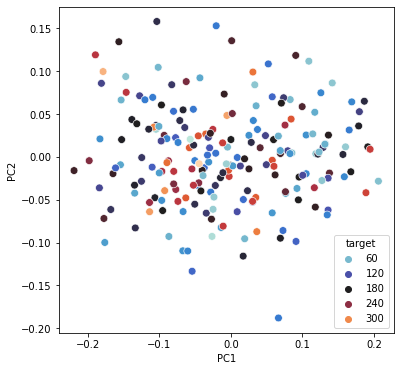

### Optimal number of components

- We note that each eigenvalue corresponds to the **variance** of each principal component (PC)


- The optimal number of PC corresponds to a trade-off between **dimensionality reduction** and **information loss**


- One way to quantify this trade-off (w.r.t. $k$) is computing the ratio of the cumulative variance:

$$
\text{ratio} = \frac{\sum_{i=1}^{k} \lambda_i}{\sum_{i=1}^{d} \lambda_i}
$$


#### Question 3:

Plot the ratio of the cumulative variance `ratio` as a function of the number of principal components `PC`

#### Question 4:

- Calibrate the number of PC $k$ as keeping (approximately) $80\%$ of the variance. Named it `k_optimal`


- Do a dimensionality reduction on the Diabetes datasets (`X_full` AND `X_test_full`) with `k=k_optimal`. Name them respectively `X_opt` and `X_test_opt`.


### Linear regression after PCA

#### Question 5:

- Fit a linear regression on the data `(X_opt, y)`


- Predict the response of the set `X_opt_test` and evaluate the model's performance with MSE


- Comment your results

### PCA with scikit-learn

[0.42128723 0.13160638]


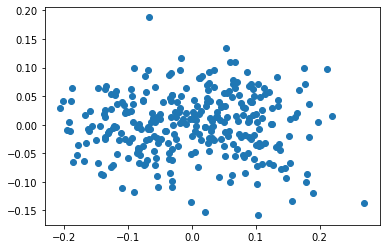

In [12]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_full_reduced = pca.fit_transform(X_full)
X_test_reduced = pca.transform(X_test_full)
print(pca.explained_variance_ratio_)
plt.scatter(X_full_reduced[:,0], X_full_reduced[:,1]);

## (optional) Application 4: Support Vector Machines (SVM) <a name="3"></a>

### SVM: Visualization and intuition

Notes:

- space of correct hyperplanes



- margin



- optimal hyperplane: maximizing the margin



- intuition about the following expression: $\sum\limits_{i=1}^{n}\max(0, 1-y_i(w^Tx_i+b))$

### Optimization problem (Tikhonov version)

The SVM prediction function is the solution of
$$
\min\limits_{w\in\mathbb{R}^d, b\in\mathbb{R}} \left\{ \frac{1}{2}\lvert\lvert w \lvert\lvert^2 + \frac{c}{2}\sum\limits_{i=1}^{n}\max(0, 1-y_i(w^Tx_i+b))  \right\}
$$

- Unconstrained optimization


- Not differentiable because of the max


- Let us reformulate into a differentiable problem.

### Unconstraint to constraint optimization

The SVM optimization is equivalent to:
\begin{align*}
\min \quad & \dfrac{1}{2}\lvert\lvert w \lvert\lvert^2 + \dfrac{c}{n}\sum\limits_{i=1}^{n} \xi \\
\text{subject to} \quad & \xi_i \geq \max(0, 1-y_i(w^Tx_i+b)) \quad \text{for all i}
\end{align*}

Equivalently
\begin{align*}
\min \quad & \dfrac{1}{2}\lvert\lvert w \lvert\lvert^2 + \dfrac{c}{n}\sum\limits_{i=1}^{n} \xi_i \\
\text{subject to} \quad & -\xi_i \leq 0\quad \text{for all i}\\
& 1-y_i(w^Tx_i+b)-\xi_i \leq 0 \quad \text{for all i}
\end{align*}

- Differentiable function



- Quadratic programming (can be solved numerically)

### Lagrange multipliers

Therefore the primal problem:

\begin{align*}
\min \quad & \dfrac{1}{2}\lvert\lvert w \lvert\lvert^2 + \dfrac{c}{n}\sum\limits_{i=1}^{n} \xi_i \\
\text{subject to} \quad & -\xi_i \leq 0\quad \text{for all i}\\
& 1-y_i(w^Tx_i+b)-\xi_i \leq 0 \quad \text{for all i}
\end{align*}

and the associated Langrangian is:
\begin{align*}
\mathcal{L}(w, b, \xi, \alpha, \lambda) &= \frac{1}{2}\lvert\lvert w \lvert\lvert^2 + \dfrac{c}{n}\sum\limits_{i=1}^{n}\xi_i  + \sum\limits_{i=1}^{n}\alpha_i (1-y_i(w^Tx_i+b)-\xi_i) - \sum\limits_{i=1}^{n} \lambda_i\xi_i\\
& = \frac{1}{2} w^Tw + \sum\limits_{i=1}^{n}\xi_i\left( \frac{c}{n}-\alpha_i-\lambda_i \right) + \sum\limits_{i=1}^{n}\alpha_i \left( 1-y_i(w^Tx_i+b) \right)
\end{align*}




## (Optional) Questions

- **Question 1:** show that we have a **strong duality**.


- **Question 2:** given that fact, give the expression of the optimal points $w^*, b^*$ and $\xi_i$ w.r.t the lagrange multipliers and the data.


- **Question 3:** deduce the new (simplified) SVM dual problem.

## Application 5: Titanic challenge <a name="5"></a>

Your exam consists of doing (**individually** or in **groups of 3** maximum) the (infamous) [Titanic challenge](https://www.kaggle.com/c/titanic) and: 

1. ($60\%$) write a report of approx. **5-10 pages**

2. ($40\%$) make a presentation of approx. **20 minutes** (+ ~10 minutes of questions)

describing your methodology and the model (and its optimisation) used.

The date of the exam is: **27, June 2022** at 10 a.m.